## Technical Task Solutions 

Author: Akshara Kannan 

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [32]:
df = pd.read_csv('event_data_states.csv')
df.head()
df1 = pd.read_csv('event_data_states.csv')
df1=df1.dropna(axis=0)
df1.head()

,id,created,eventType,eventValue,jobId,country,slug,geo,state,postal
0,291A0388D8525FC7422BEB97C7D9481B,2022-08-22 15:30:46,Apply,10780,6301f4e68d484170669791ba,US,doordash,POINT(-122.04619996 47.62540000),washington,WA
1,C5733B31E12896633B1A8FAEBE96DD47,2022-08-22 15:36:35,Apply,5179,63039b4b3bbdc2174316c1f6,US,doordash,POINT(-80.06789997 40.90490003),pennsylvania,PA
2,53FDFAF42206E5607BC5424581F5EFDB,2022-08-22 15:38:17,Apply,10780,6301ce1e01883c93725f98d1,US,doordash,POINT(-122.22810002 47.56029999),washington,WA
3,8C3AC70079C6EF595DCAB2EDFB904376,2022-08-22 15:56:08,Apply,4200,63039bf43bbdc2174316c654,US,doordash,POINT(-108.59680003 39.10710003),colorado,CO
4,84AF4C71DFCC270577140469C8901D04,2022-08-22 16:49:36,Apply,7909,63039c803bbdc2174316ca51,US,doordash,POINT(-86.79160002 36.15040004),tennessee,TN


In [33]:
df[df.isna().any(axis=1)]

,id,created,eventType,eventValue,jobId,country,slug,geo,state,postal
184,C042D8D20171ADADAF82F8207FA8E35C,2022-08-24 11:16:52,Apply,4550,6305f773999a2ff702cb7776,CA,doordash,POINT(-83.02434000 42.31954001),NaN,NaN
911,E1CEC86760EF784A037A103B2C68450F,2022-09-15 12:08:44,Apply,5179,6320f67ef5b0e1f307950ac5,US,doordash,POINT(-75.07600000 38.72090002),NaN,NaN


In [34]:
df1[df1.isna().any(axis=1)]

,id,created,eventType,eventValue,jobId,country,slug,geo,state,postal


### Questions
2. Create a visualisation showing distribution of events across states (e.g. bar charts, maps)
3. Create a visualisation showing the sum value of events across states
4. Identify and visualise temporal trends of the event data (e.g. moving average of total daily eventValues)

## Solution 2), 3), 4) 

### Data Preprocessing
#### Grouping the dataframe on states 

1. Aggregate on number of apply events to get total no. of 'applications'

In [35]:
applications_df = df.groupby([ 'state', 'postal', 'country']).size().to_frame(name = 'applications').reset_index()
applications_df.head()

,state,postal,country,applications
0,alabama,AL,US,71
1,alaska,AK,US,10
2,arizona,AZ,US,10
3,arkansas,AR,US,14
4,british-columbia,BC,CA,4


2. Aggregate on sum of eventValues to get the total amount earned in each state

In [36]:
eventvalue_df = df.groupby([ 'state', 'country']).sum().reset_index()
eventvalue_df.head()

,state,country,eventValue
0,alabama,US,602137
1,alaska,US,54316
2,arizona,US,80356
3,arkansas,US,71674
4,british-columbia,CA,33668


#### Concatenate the two groupby results, and sort on applications column

In [39]:
apps_eventvalue = pd.concat([applications_df, eventvalue_df], axis=1).T.drop_duplicates().T
apps_eventvalue.sort_values(['applications', 'eventValue'], inplace=True, ignore_index=True)
apps_eventvalue['eventValue'] = pd.to_numeric(apps_eventvalue['eventValue'])
apps_eventvalue['applications'] = pd.to_numeric(apps_eventvalue['applications'])
apps_eventvalue.head()

,state,postal,country,applications,eventValue
0,south-dakota,SD,US,1,4129
1,new-mexico,NM,US,1,4200
2,nova-scotia,NS,CA,1,9169
3,manitoba,MB,CA,2,22846
4,wyoming,WY,US,3,12600


### Plotting horizontal bar graph 
#### Horizontal bar graphs of the cumulative apply events in each state

The following bar graph has states on the vertical axis and the metric of events on the horizontal axis. The two plots plot side-by-side the total number of applications and the total value of apply events for each state. 



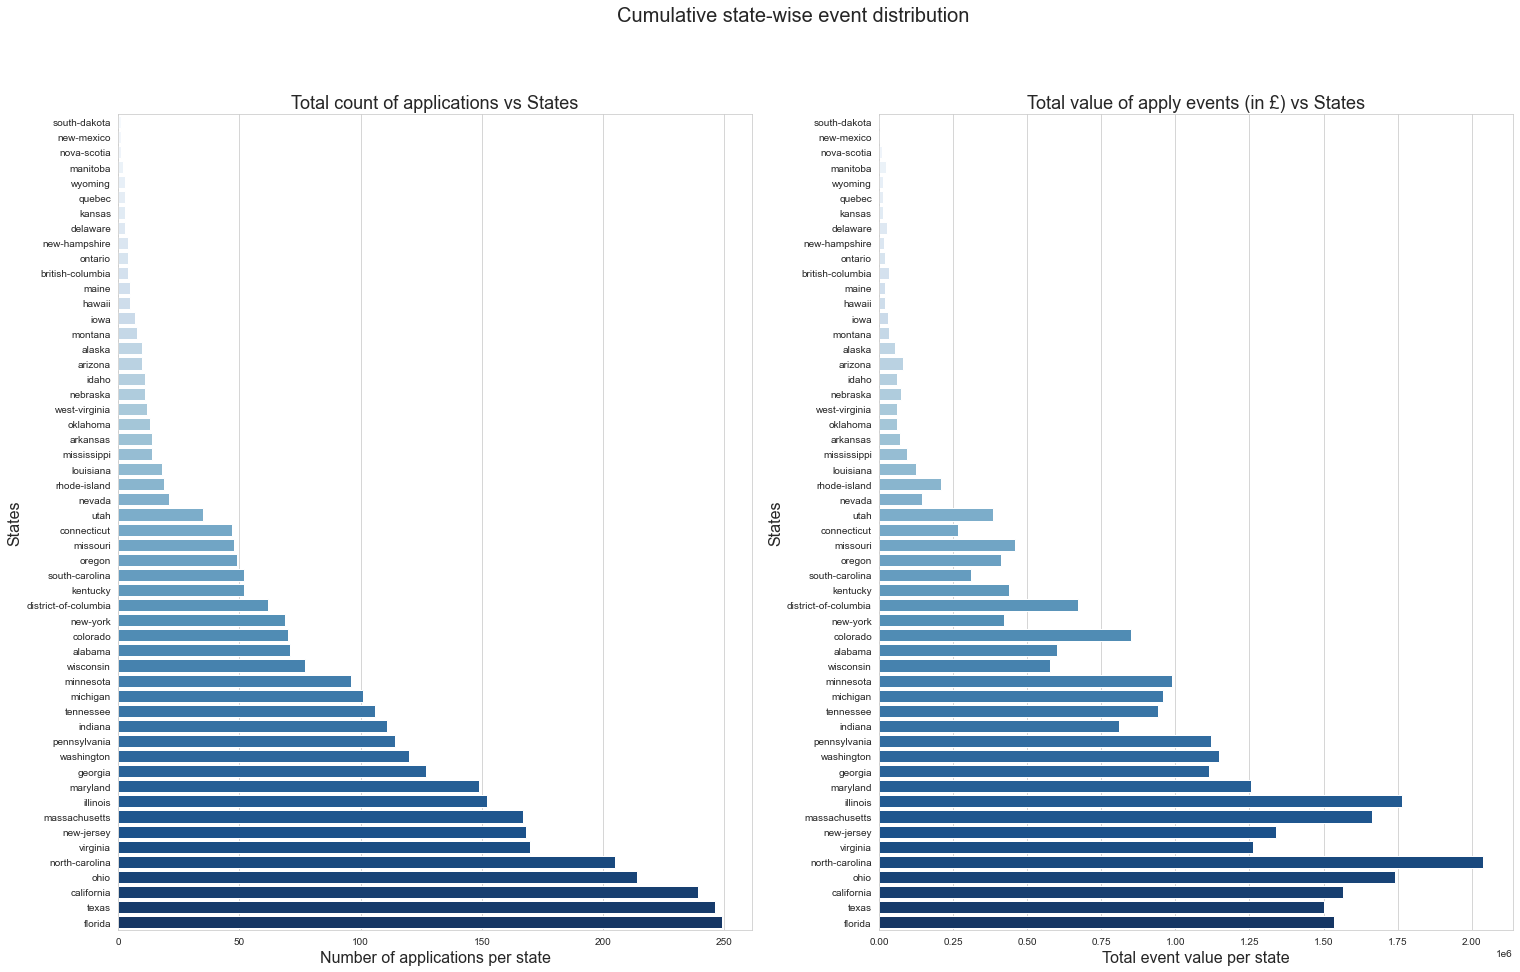

In [40]:
sns.set_style("whitegrid" )
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,15))
fig.suptitle("Cumulative state-wise event distribution", size=20)

ax= sns.barplot(data=apps_eventvalue, x='applications', y='state', ci=None, ax=ax1,palette='Blues')
ax.set_xlabel('Number of applications per state', fontsize=16 )
ax.set_ylabel('States', fontsize=16 )
ax1.set_title('Total count of applications vs States', size=18)

bx= sns.barplot(data=apps_eventvalue, x='eventValue', y='state', ci=None, ax=ax2, label='Total applications',palette='Blues' )
bx.set_xlabel('Total event value per state',size=16)
bx.set_ylabel('States', size=16)

ax2.set_title('Total value of apply events (in £) vs States',size=18)

plt.show()

#### This pair of horizontal bar graphs show how the apply events are distributed across the states. We have Florida with highest number of applications and North carolina, Ohio, California and Texas with over 200 applications. 

#### One might be tempted to conclude that these states are the highest grossing states. But, because our value/event varies, we can see varying behaviour with the total amount per state. With the same sort order maintained in the second graph (on applications), we can see the gradient maturing earlier in teh states axis. To be specific, we can see that though Florida has ~ 50 more applications than North Caroline, the latter is valued higher with ~ 50e6 more money. 


In [7]:
apps_eventvalue['statewise_cost_per_application'] = (apps_eventvalue['eventValue']/apps_eventvalue['applications']).round(2)
apps_eventvalue.head()


,state,postal,applications,eventValue,statewise_cost_per_application
0,nova-scotia,NS,1,9169,9169.0
1,new-mexico,NM,1,4200,4200.0
2,south-dakota,SD,1,4129,4129.0
3,manitoba,MB,2,22846,11423.0
4,kansas,KS,3,14700,4900.0


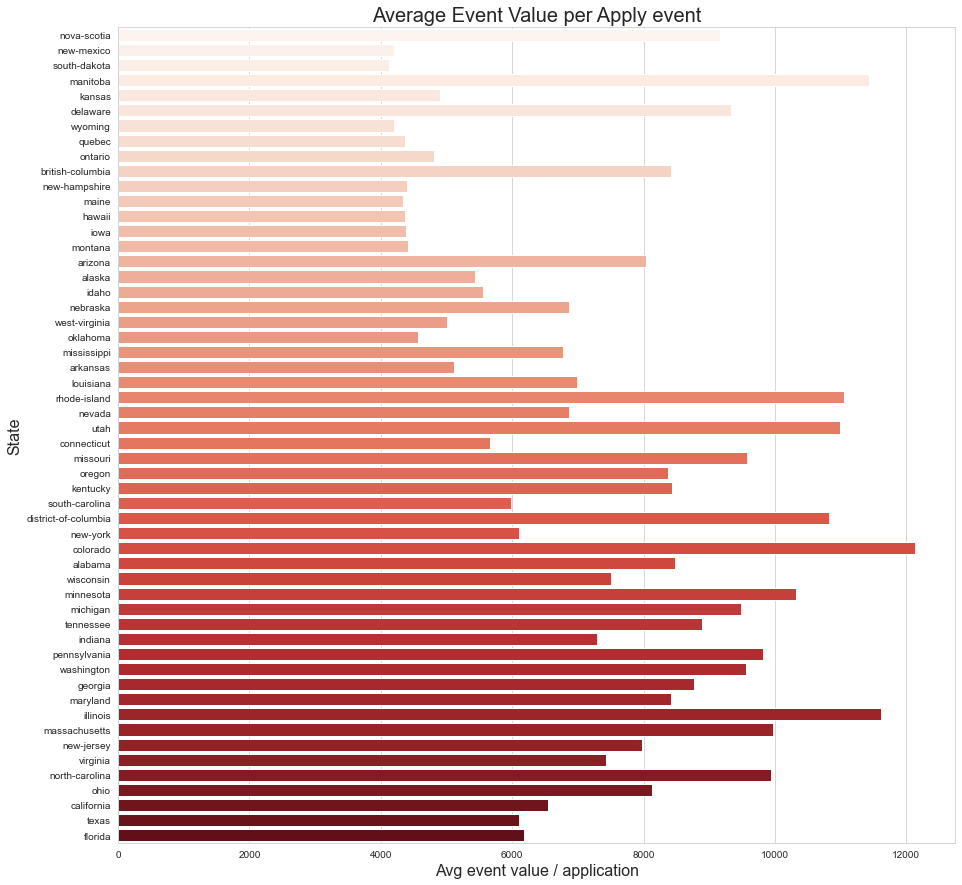

In [8]:
sns.set_style("whitegrid" )
fig= plt.figure(figsize=(15,15))

apps_eventvalue.sort_values('applications', inplace=True)
ax= sns.barplot(data=apps_eventvalue, x='statewise_cost_per_application', y='state', ci=None, palette='Reds')
ax.set_xlabel('Avg event value / application', size=16)
ax.set_ylabel('State', size=16)

plt.title("Average Event Value per Apply event", fontdict={'fontsize': 20})

plt.show()

#### This plot visualises the average event value gained per application in each state. 

## Visualising using geopandas

Choropleth map is a geographical representation of the dataset where the color of the graph elements correspond to the value of an associated variable. The event_data.csv file contains a geometry column that can be used to load the data as a geopandas data frame. The latitude longitude pairs are stored as POINTS which when plotted on a graph usign geopandas .plot(), plots the states as 1D markers on a map. It is pointless to visualise the event trends using location markers for each state. Alternatively, we can fetch the state boundary geometry from open source census datasets that represents states as POLYGON or MULTIPOLYGON 

In [9]:
def check_duplicates(l):
    if len(l.unique()) == len(l):
        return True
    else:
        return False

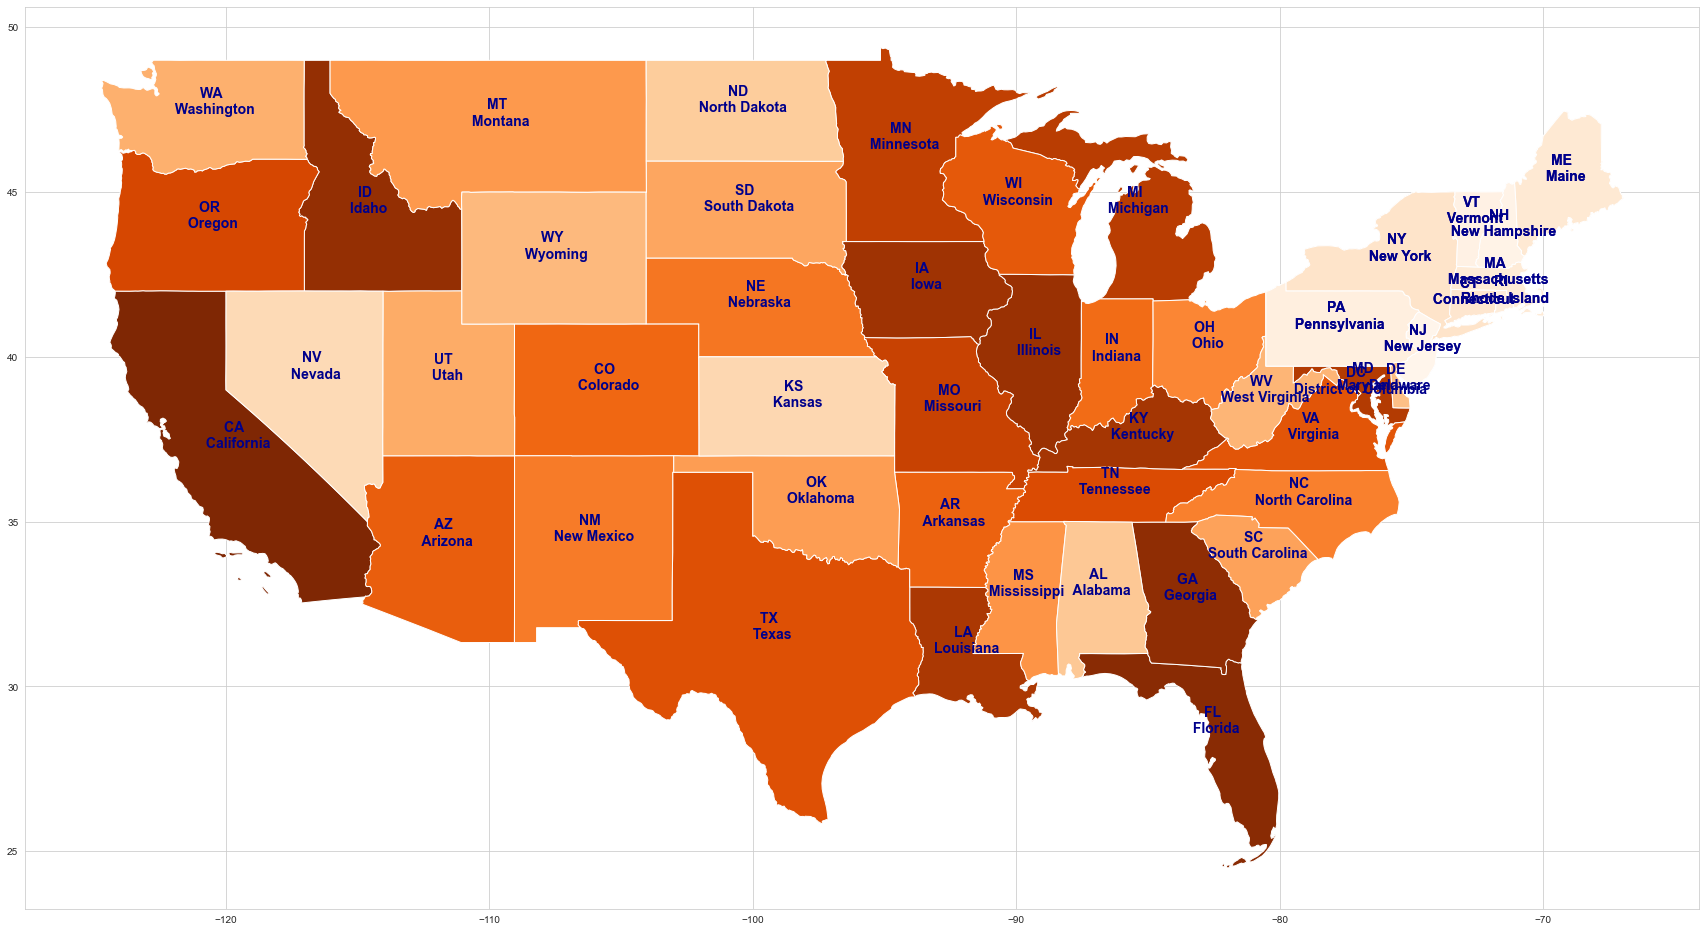

In [13]:
states = gpd.read_file('census_data/usa-states-census-2014.shp')

ax = states.plot(cmap='Oranges_r', figsize=(30, 30))
states.apply(lambda x: ax.annotate(text=f"{x.STUSPS} \n {x.NAME}", xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='darkblue', fontweight=600),axis=1);


### Join our original dataframe containing aggregated values per state and the `states` df containing data from the shape file

In [14]:
US = pd.merge(apps_eventvalue, states[['geometry', 'STUSPS']],right_on="STUSPS", left_on="postal", how="inner")
US = US.drop('STUSPS', axis=1)
US.head()

,state,postal,country,applications,eventValue,geometry
0,new-mexico,NM,US,1,4200,"POLYGON Z ((-109.04919 31.79655 0.00000, -109...."
1,south-dakota,SD,US,1,4129,"POLYGON Z ((-104.05770 44.99743 0.00000, -104...."
2,kansas,KS,US,3,14700,"POLYGON Z ((-102.05174 40.00308 0.00000, -101...."
3,delaware,DE,US,3,28000,"POLYGON Z ((-75.77379 39.72220 0.00000, -75.75..."
4,wyoming,WY,US,3,12600,"POLYGON Z ((-111.05689 44.86666 0.00000, -111...."


Doing an Inner join removes the rows from our df that don't have a corresponding indexed row in the `states` df. This is deliberately done in this notebook to remove the rows for canadian states such as british-columbia, quebec. Therefore, the following map contains the eventValue distribution only for the US states.

### Connect the df to geopandas to plot the maps

In [17]:
gdf = gpd.GeoDataFrame(US, geometry='geometry')
gdf['eventValue'] = pd.to_numeric(gdf['eventValue'])
gdf['applications'] = pd.to_numeric(gdf['applications'])
gdf=gdf.drop_duplicates()


In [19]:
print(US.country.unique(), apps_eventvalue.country.unique())

['US'] ['CA' 'US']


In [16]:
print(len(gdf['postal'])) 
print(gdf['state'].values)

47
['new-mexico' 'south-dakota' 'kansas' 'delaware' 'wyoming' 'new-hampshire'
 'maine' 'iowa' 'montana' 'arizona' 'idaho' 'nebraska' 'west-virginia'
 'oklahoma' 'mississippi' 'arkansas' 'louisiana' 'rhode-island' 'nevada'
 'utah' 'connecticut' 'missouri' 'oregon' 'kentucky' 'south-carolina'
 'district-of-columbia' 'new-york' 'colorado' 'alabama' 'wisconsin'
 'minnesota' 'michigan' 'tennessee' 'indiana' 'pennsylvania' 'washington'
 'georgia' 'maryland' 'illinois' 'massachusetts' 'new-jersey' 'virginia'
 'north-carolina' 'ohio' 'california' 'texas' 'florida']


In [14]:
gdf.dtypes

state                               object
postal                              object
applications                         int64
eventValue                           int64
statewise_cost_per_application     float64
geometry                          geometry
dtype: object

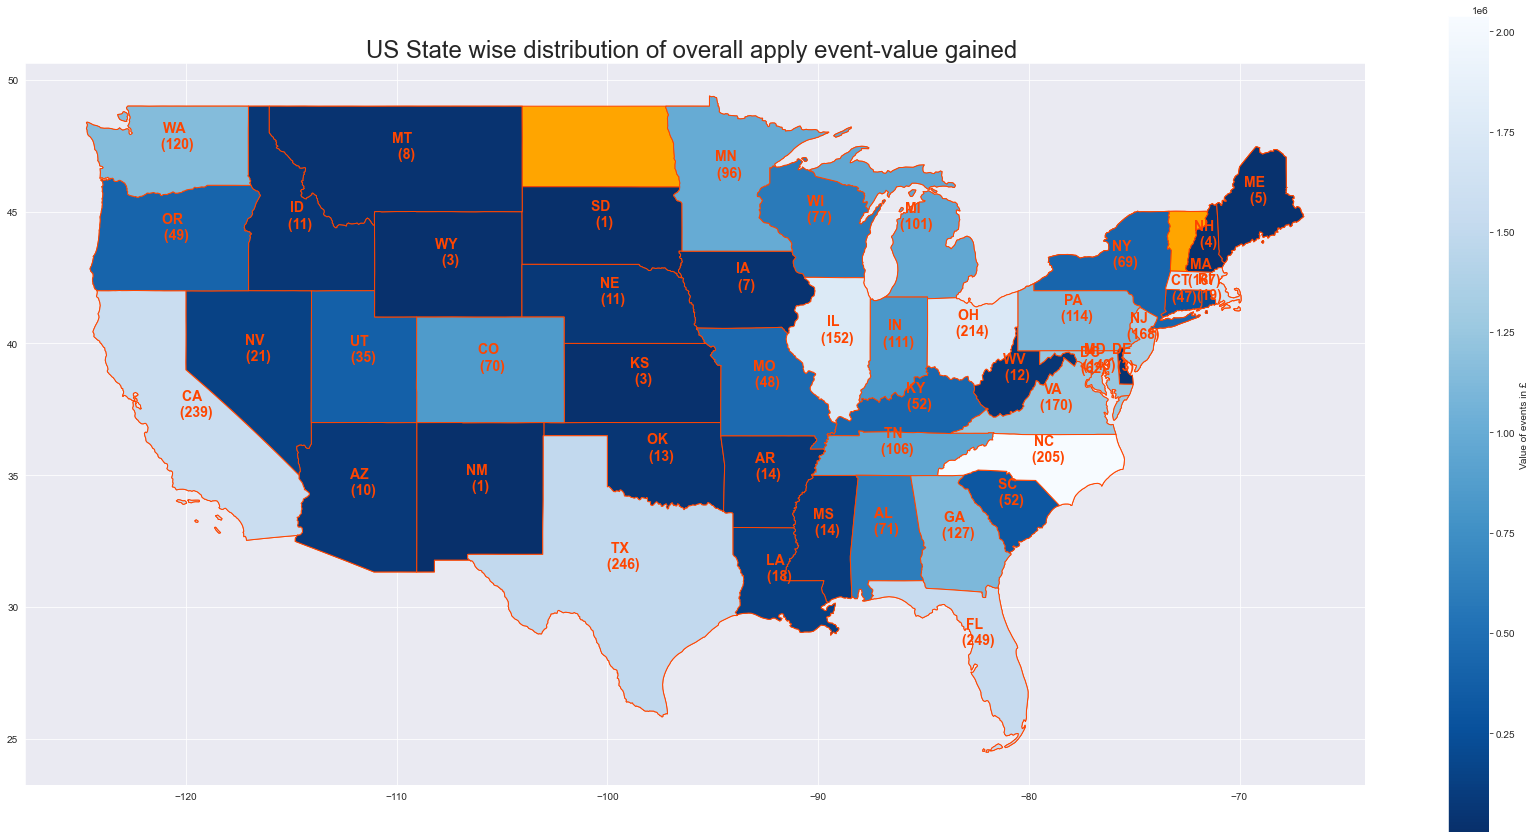

In [15]:
legend_kwds={'label': "Value of events in £",'orientation': "vertical","shrink":0.5}
sns.set_style('darkgrid')

ax = states.plot(edgecolor='orangered', color ='orange', figsize=(30, 30),)
bx = gdf.plot(ax=ax, column='eventValue',cmap='Blues_r',figsize=(30, 30), edgecolor='orangered', legend=True, legend_kwds=legend_kwds)

gdf.apply(lambda x: bx.annotate(text=f"{x.postal} \n ({str(x.applications)})", xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='orangered', fontweight=900),axis=1);

bx.set_title('US State wise distribution of overall apply event-value gained ', size=24)
plt.show()

#### Trends observed
As we can see in the legend scale, lighter values correspond to higher values of cumulative event value. For the states for which we don't have a row in our events dataset has been displayed with a different colour palette. Additonally, the numerical value below each postcode, depicts the total number of applications/apply events recorded in that state. This could help visualise the scale at which apply events differ across states, and the range of events over which the specified event values have been gained. 

## Let's revisit our data frame containing event rows with state information to visualise temporal trends. 

In [16]:
df.head()

,id,created,eventType,eventValue,jobId,country,slug,geo,state,postal
0,291A0388D8525FC7422BEB97C7D9481B,2022-08-22 15:30:46,Apply,10780,6301f4e68d484170669791ba,US,doordash,POINT(-122.04619996 47.62540000),washington,WA
1,C5733B31E12896633B1A8FAEBE96DD47,2022-08-22 15:36:35,Apply,5179,63039b4b3bbdc2174316c1f6,US,doordash,POINT(-80.06789997 40.90490003),pennsylvania,PA
2,53FDFAF42206E5607BC5424581F5EFDB,2022-08-22 15:38:17,Apply,10780,6301ce1e01883c93725f98d1,US,doordash,POINT(-122.22810002 47.56029999),washington,WA
3,8C3AC70079C6EF595DCAB2EDFB904376,2022-08-22 15:56:08,Apply,4200,63039bf43bbdc2174316c654,US,doordash,POINT(-108.59680003 39.10710003),colorado,CO
4,84AF4C71DFCC270577140469C8901D04,2022-08-22 16:49:36,Apply,7909,63039c803bbdc2174316ca51,US,doordash,POINT(-86.79160002 36.15040004),tennessee,TN


In [17]:
subdf = df.loc[:,['created', 'eventValue','state']]
subdf.head()

,created,eventValue,state
0,2022-08-22 15:30:46,10780,washington
1,2022-08-22 15:36:35,5179,pennsylvania
2,2022-08-22 15:38:17,10780,washington
3,2022-08-22 15:56:08,4200,colorado
4,2022-08-22 16:49:36,7909,tennessee


In [18]:
subdf.dtypes

created       object
eventValue     int64
state         object
dtype: object

In [19]:
type(subdf['created'][0])

str

In [20]:
subdf['date'] = subdf.created.str.split(" ",expand=True)[0]


In [21]:
subdf.head()

,created,eventValue,state,date
0,2022-08-22 15:30:46,10780,washington,2022-08-22
1,2022-08-22 15:36:35,5179,pennsylvania,2022-08-22
2,2022-08-22 15:38:17,10780,washington,2022-08-22
3,2022-08-22 15:56:08,4200,colorado,2022-08-22
4,2022-08-22 16:49:36,7909,tennessee,2022-08-22


In [22]:
subdf['created_dt'] = pd.to_datetime(subdf['created'])
subdf['day']= subdf['created_dt'].dt.day_name()
subdf

,created,eventValue,state,date,created_dt,day
0,2022-08-22 15:30:46,10780,washington,2022-08-22,2022-08-22 15:30:46,Monday
1,2022-08-22 15:36:35,5179,pennsylvania,2022-08-22,2022-08-22 15:36:35,Monday
2,2022-08-22 15:38:17,10780,washington,2022-08-22,2022-08-22 15:38:17,Monday
3,2022-08-22 15:56:08,4200,colorado,2022-08-22,2022-08-22 15:56:08,Monday
4,2022-08-22 16:49:36,7909,tennessee,2022-08-22,2022-08-22 16:49:36,Monday
...,...,...,...,...,...,...
3570,2022-10-21 4:13:20,4200,texas,2022-10-21,2022-10-21 04:13:20,Friday
3571,2022-10-21 6:11:25,11059,minnesota,2022-10-21,2022-10-21 06:11:25,Friday
3572,2022-10-21 8:54:28,7000,ohio,2022-10-21,2022-10-21 08:54:28,Friday
3573,2022-10-21 9:47:02,11480,illinois,2022-10-21,2022-10-21 09:47:02,Friday


In [23]:
subdf_wo_created = subdf.drop(['created', 'created_dt'], axis=1)


In [24]:
daily_df = subdf_wo_created.groupby(['date', 'day']).agg({'eventValue': 'sum', 'state':'count'}).reset_index()

In [25]:
daily_df.rename(columns={'eventValue':'eventValue_per_day', 'state':'apply_per_day'}, inplace=True)

In [26]:
daily_df['apply_per_day'].sum(axis=0)

3573

In [27]:
daily_df.head()

,date,day,eventValue_per_day,apply_per_day
0,2022-08-22,Monday,239392,35
1,2022-08-23,Tuesday,160294,25
2,2022-08-24,Wednesday,343121,53
3,2022-08-25,Thursday,259258,43
4,2022-08-26,Friday,97015,16


In [28]:
daily_df['7_day_event_avg'] = daily_df.eventValue_per_day.rolling(7).mean().shift(-3)

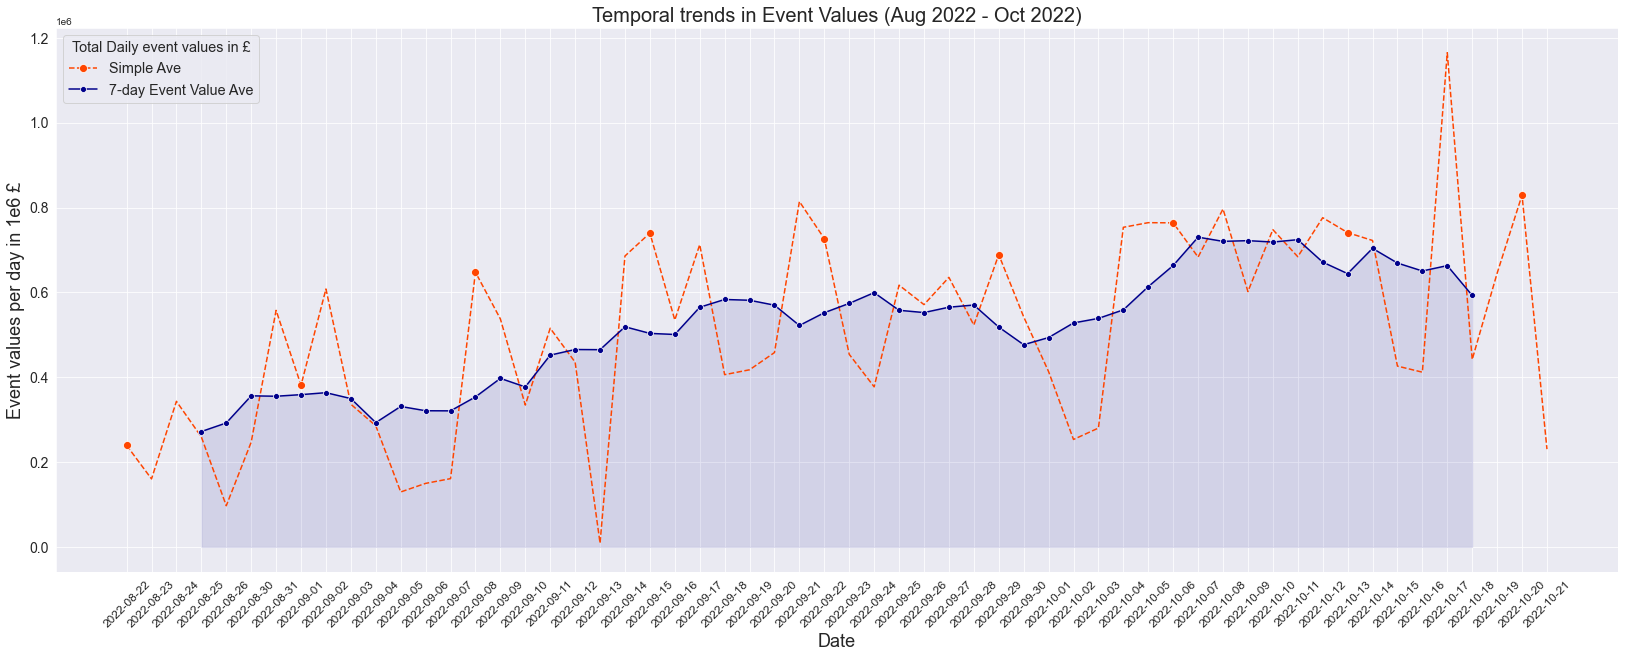

In [34]:
fig , ax = plt.subplots(1,1, sharex=True,figsize=(28, 10))

simple = sns.lineplot(ax=ax, x="date", y="eventValue_per_day", label="Simple Ave", data=daily_df, marker='o', linestyle='dashed', color='orangered', legend = True, markersize=8, markevery=7 )
rolling = sns.lineplot(ax=ax, x="date",y="7_day_event_avg", label="7-day Event Value Ave",data=daily_df, ci=None, marker='o',linestyle='solid', color='darkblue', legend = True)

ax.fill_between(x= daily_df['date'], y1 = 0, y2=daily_df['7_day_event_avg'], color='darkblue', alpha=0.1)

ax.set_xlabel("Date", size=18)
ax.set_ylabel("Event values per day in 1e6 £", size=18)

ax.tick_params(axis='x', labelrotation = 45, labelsize=12)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Temporal trends in Event Values (Aug 2022 - Oct 2022)", size=20)
ax.legend(loc='upper left', title='Total Daily event values in £', fontsize='x-large', title_fontsize='x-large')


#### Identifying temporal trends
The above lineplot plots the simnple average as well as the moving average over the period of two months in 2022- 22nd Aug to 21st Oct. The orange marker in the simple average line plot in the graph depict the start of a new week in the time series plot. Over such a short period of time, trends are tougher and ambiguous to identify in a dataset. A good instance of that is: in the above plot, there's no steady increase or decrease in the total daily eventValues that we can generalise across months or days of the week. Alternatively, a rolling or moving average calculates the mean over windows of a specified value. such a metric smoothes over false signals and makes it easier to identify trends. 
By fixing our window as 7, a week's worth of data is used to calculate the average. Hence we can ensure that our window is not stale wrt the market trend. 

The blue line plotted above shows us that within a month, event Values increase towards the end of the month, and fall towards the start of a new month. Over the whole of two months, we can see that there's a gentle rise in event values, which is understandable as most courses complete over September and a nw batch of job seekers enter the market. 


#### A similar graph is plotted below for the number of applications metric. 

Text(0.5, 1.0, 'Temporal trends in number of Apply events (Aug 2022 - Oct 2022)')

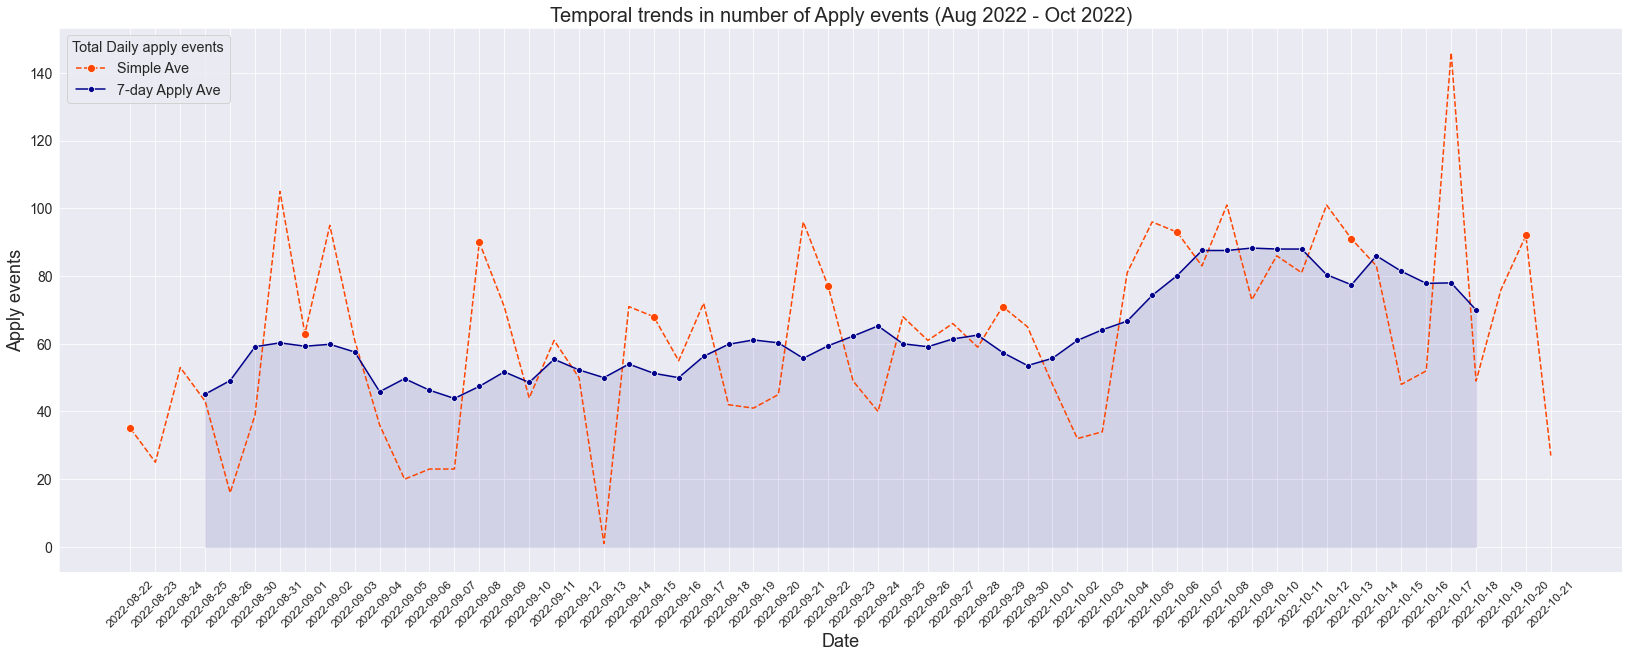

In [37]:
daily_df['7_day_apply_avg'] = daily_df.apply_per_day.rolling(7).mean().shift(-3)
fig , ax = plt.subplots(1,1, sharex=True,figsize=(28, 10))

simple = sns.lineplot(ax=ax, x="date", y="apply_per_day", label="Simple Ave", data=daily_df, marker='o', linestyle='dashed', color='orangered', legend = True, markersize=8, markevery=7 )
rolling = sns.lineplot(ax=ax, x="date",y="7_day_apply_avg", label="7-day Apply Ave",data=daily_df, ci=None, marker='o',linestyle='solid', color='darkblue', legend = True)

ax.fill_between(x= daily_df['date'], y1 = 0, y2=daily_df['7_day_apply_avg'], color='darkblue', alpha=0.1)

ax.set_xlabel("Date", size=18)
ax.set_ylabel("Apply events", size=18)

ax.tick_params(axis='x', labelrotation = 45, labelsize=12)
ax.tick_params(axis='y', labelsize=14)

ax.legend(loc='upper left', title='Total Daily apply events', fontsize='x-large', title_fontsize='x-large')
ax.set_title("Temporal trends in number of Apply events (Aug 2022 - Oct 2022)", size=20)